# Lab 5 - Digital Marketing Campaign: Engineering and Cluster Size Finding
Joshy Kasahara & Isaac Braun\
Dataset from [Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/data)

## Import Packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import resample, shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

## Read in Data

In [3]:
base_path = '../datasets/'
raw = pd.read_csv(base_path + 'digital_marketing_campaign_dataset.csv')
raw = raw.drop(['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool', "LoyaltyPoints"], axis=1)

In [6]:
raw.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,Conversion
0,56,0,136912,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,1
1,69,1,41760,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,1
2,46,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,1
3,32,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,1
4,60,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,1


## Engineer Data - Normalize and Split

In [7]:
labelEncoder = LabelEncoder()
encoded = raw
# Label Encode String Columns

"""
Gender
0. Female
1. Male
"""
encoded['Gender'] = labelEncoder.fit_transform(encoded['Gender'].values)

"""
CampaignType 
0. Awareness
1. Consideration
2. Conversion
3. Retention
"""
encoded['CampaignType'] = labelEncoder.fit_transform(encoded['CampaignType'].values)

"""
CampaignChannel
0. Email
1. PPC
2. Referall
3. SEO
4. Social Media
"""
encoded['CampaignChannel'] = labelEncoder.fit_transform(encoded['CampaignChannel'].values)

print(encoded.head())
encoded.to_csv(base_path + 'marketing-campaign-encoded.csv', index=False, header=True)

   Age  Gender  Income  CampaignChannel  CampaignType      AdSpend  \
0   56       0  136912                4             0  6497.870068   
1   69       1   41760                0             3  3898.668606   
2   46       0   88456                1             0  1546.429596   
3   32       0   44085                1             2   539.525936   
4   60       0   83964                1             2  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   SocialShares  EmailOpens  EmailClicks  PreviousPurchases  Conversion  
0            19   

## K-Means Testing

In [13]:
kmeans = KMeans(random_state = 81)

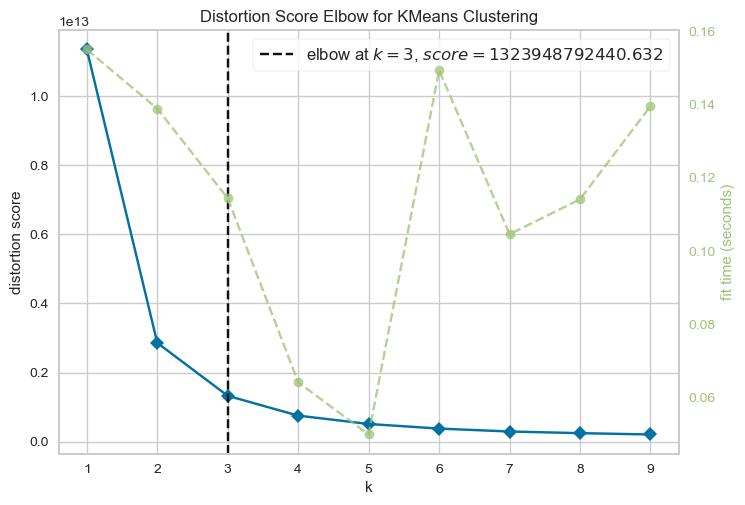

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
elb_viz = KElbowVisualizer(kmeans, k=(1, 10))
elb_viz.fit(encoded)
elb_viz.show()

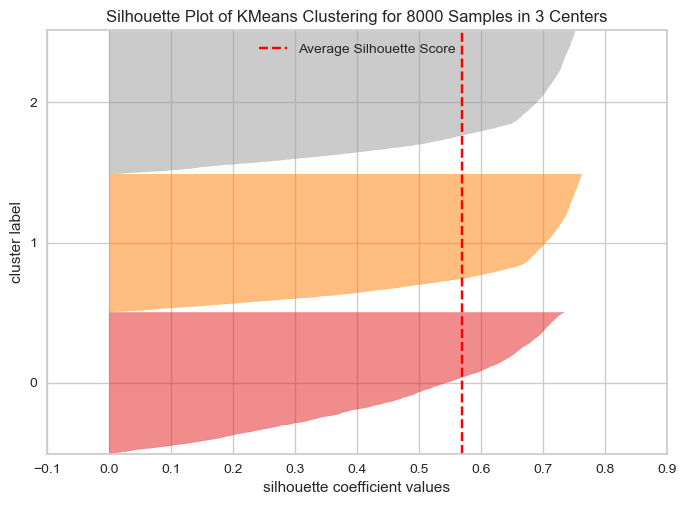

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
kmeans_3 = KMeans(n_clusters = 3, random_state = 81)

sil_viz = SilhouetteVisualizer(kmeans_3)
sil_viz.fit(encoded)
sil_viz.show()

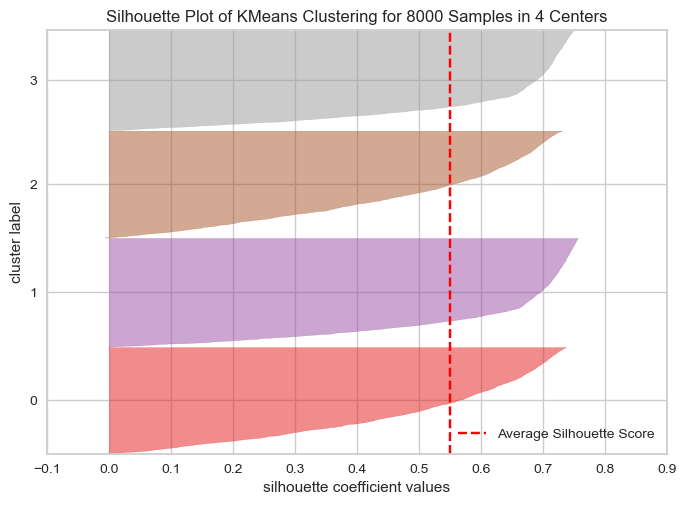

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
kmeans_4 = KMeans(n_clusters = 4, random_state = 81)

sil_viz = SilhouetteVisualizer(kmeans_4)
sil_viz.fit(encoded)
sil_viz.show()